In [1]:
#Import Depencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [2]:
#Load Datasets
#popn_df = pd.read_csv("Resource/County_Popn.csv")
ownership_rate = pd.read_csv("Resource/OwnerRateTop5.csv")
popn = pd.read_csv("Resource/PopTop5.csv")
median_income = pd.read_csv("Resource/mhinc.csv")
#permits_df = pd.read_csv("Resource/Building_Permits.csv")
#income_df = pd.read_csv("Resource/Median_Income.csv")

In [3]:
# Display ownership rate data
ownership_rate

,Year,State,County,CountyID,Ownership Rate (%)
0,2009,ID,Ada,AdaID2009,73.167951
1,2010,ID,Ada,AdaID2010,72.448222
2,2011,ID,Ada,AdaID2011,71.267323
3,2012,ID,Ada,AdaID2012,69.819289
4,2013,ID,Ada,AdaID2013,69.484129
...,...,...,...,...,...
2707,2015,AZ,Yuma,YumaAZ2015,67.905447
2708,2016,AZ,Yuma,YumaAZ2016,67.824290
2709,2017,AZ,Yuma,YumaAZ2017,67.638026
2710,2018,AZ,Yuma,YumaAZ2018,67.216111


In [4]:
popn

,State,Year,County,CountyID,Popn Change,Pop Change (%),Population
0,AL,2010,Baldwin,BaldwinAL2010,40969,22.477711,183112
1,AL,2011,Baldwin,BaldwinAL2011,40969,22.477711,186558
2,AL,2012,Baldwin,BaldwinAL2012,40969,22.477711,190145
3,AL,2013,Baldwin,BaldwinAL2013,40969,22.477711,194885
4,AL,2014,Baldwin,BaldwinAL2014,40969,22.477711,199183
...,...,...,...,...,...,...,...
2495,WY,2015,Albany,AlbanyWY2015,2581,7.110389,37960
2496,WY,2016,Albany,AlbanyWY2016,2581,7.110389,37923
2497,WY,2017,Albany,AlbanyWY2017,2581,7.110389,38459
2498,WY,2018,Albany,AlbanyWY2018,2581,7.110389,38728


In [5]:
median_income

,Year,State,County,CountyID,Income
0,2009,AL,Baldwin,BaldwinAL2009,48637
1,2010,AL,Baldwin,BaldwinAL2010,47618
2,2011,AL,Baldwin,BaldwinAL2011,50144
3,2012,AL,Baldwin,BaldwinAL2012,48867
4,2013,AL,Baldwin,BaldwinAL2013,47539
...,...,...,...,...,...
2712,2015,AZ,Yuma,YumaAZ2015,40426
2713,2016,AZ,Yuma,YumaAZ2016,42998
2714,2017,AZ,Yuma,YumaAZ2017,46013
2715,2018,AZ,Yuma,YumaAZ2018,44116


In [6]:
# merge population and home ownership dataframes
#drop common columns before merge
popn = popn.drop(columns=["State", "County", "Year"])

# Merge dataframes on CountyID
pop_ownership = pd.merge(ownership_rate, popn, on="CountyID", how='inner')
pop_ownership

,Year,State,County,CountyID,Ownership Rate (%),Popn Change,Pop Change (%),Population
0,2010,ID,Ada,AdaID2010,72.448222,89215,22.737351,393354
1,2011,ID,Ada,AdaID2011,71.267323,89215,22.737351,401262
2,2012,ID,Ada,AdaID2012,69.819289,89215,22.737351,408862
3,2013,ID,Ada,AdaID2013,69.484129,89215,22.737351,415951
4,2014,ID,Ada,AdaID2014,68.500504,89215,22.737351,425471
...,...,...,...,...,...,...,...,...
2360,2015,AZ,Yuma,YumaAZ2015,67.905447,18037,9.214304,205186
2361,2016,AZ,Yuma,YumaAZ2016,67.824290,18037,9.214304,207247
2362,2017,AZ,Yuma,YumaAZ2017,67.638026,18037,9.214304,209507
2363,2018,AZ,Yuma,YumaAZ2018,67.216111,18037,9.214304,211612


In [7]:
# Merge the resulting dataframe with the median income dataframe
# First drop common columns to avoid subscriting
median_income = median_income.drop(columns=["State", "County", "Year"])

# Then merge median income to the above merged dataframe, call the final dataframe "df"
df = pd.merge(median_income, pop_ownership, on="CountyID", how="inner")
df

,CountyID,Income,Year,State,County,Ownership Rate (%),Popn Change,Pop Change (%),Population
0,BaldwinAL2010,47618,2010,AL,Baldwin,76.889446,40969,22.477711,183112
1,BaldwinAL2011,50144,2011,AL,Baldwin,76.287403,40969,22.477711,186558
2,BaldwinAL2012,48867,2012,AL,Baldwin,73.192278,40969,22.477711,190145
3,BaldwinAL2013,47539,2013,AL,Baldwin,72.061380,40969,22.477711,194885
4,BaldwinAL2014,49626,2014,AL,Baldwin,71.204280,40969,22.477711,199183
...,...,...,...,...,...,...,...,...,...
2300,YumaAZ2015,40426,2015,AZ,Yuma,67.905447,18037,9.214304,205186
2301,YumaAZ2016,42998,2016,AZ,Yuma,67.824290,18037,9.214304,207247
2302,YumaAZ2017,46013,2017,AZ,Yuma,67.638026,18037,9.214304,209507
2303,YumaAZ2018,44116,2018,AZ,Yuma,67.216111,18037,9.214304,211612


In [9]:
# Averaging the values by county
df2 = df[["Ownership Rate (%)", "Popn Change", "Pop Change (%)", "Population", "Income", "County"]].groupby(["County"]).mean()
df2

,Ownership Rate (%),Popn Change,Pop Change (%),Population,Income
County,,,,,
Ada,70.162929,89215.0,22.737351,432914.70,58786.80
Addison,76.627274,-41.0,-0.111359,36896.70,59545.90
Alameda,56.284380,161071.0,10.665131,1606881.90,82938.20
Albany,54.197032,2581.0,7.110389,37780.50,44694.20
Ascension,81.276240,19389.0,18.084223,117767.20,71029.50
...,...,...,...,...,...
Windham,72.738073,-1598.0,-1.349890,117185.30,59246.00
Wright,86.230406,13680.0,10.970593,130876.00,76802.40
Yolo,52.840932,19645.0,9.780688,210905.20,59123.30


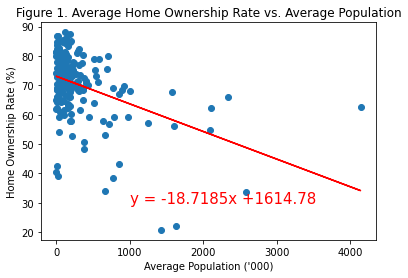

In [34]:
# Analyses of home ownership rate vs. average population ('000)

# Firsst convert population to population in thousands
df2["Population ('000)"] = (df2["Population"] / 1000)
df2

# Define the axes
x = df2.iloc[:,5].values.reshape(-1,1)
y = df2.iloc[:,0].values.reshape(-1,1)

# Fit regression line
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

# Get x & y values for regression equation
owner = df2.iloc[:,0]
pop = df2.iloc[:,5]

# Calculate parameters to get regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(owner, pop)
line_eq = "y = " +str(round(slope, 4)) + "x +" + str(round(intercept,2))


# Plot and labe the scatter plot and fit the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color="r")
plt.annotate(line_eq, (1000,30), fontsize=15, color="r")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Average Population ('000)")
plt.title("Figure 1. Average Home Ownership Rate vs. Average Population")
plt.savefig("Images/fig1.png")

In [32]:
df2

,Ownership Rate (%),Popn Change,Pop Change (%),Population,Income,Population ('000)
County,,,,,,
Ada,70.162929,89215.0,22.737351,432914.70,58786.80,432.91470
Addison,76.627274,-41.0,-0.111359,36896.70,59545.90,36.89670
Alameda,56.284380,161071.0,10.665131,1606881.90,82938.20,1606.88190
Albany,54.197032,2581.0,7.110389,37780.50,44694.20,37.78050
Ascension,81.276240,19389.0,18.084223,117767.20,71029.50,117.76720
...,...,...,...,...,...,...
Windham,72.738073,-1598.0,-1.349890,117185.30,59246.00,117.18530
Wright,86.230406,13680.0,10.970593,130876.00,76802.40,130.87600
Yolo,52.840932,19645.0,9.780688,210905.20,59123.30,210.90520


### Discussion of Results
The data consists of 196 of the fastest growing counties selected among the top population growth counties in each state. The variables are defined as follows:
* The ***Ownership rate (%)*** is the percentage of home occupied by the homeowners in each county
* ***Pop Change*** is the absolute change in the population in the ten-year period between 2009 and 2019
* ***Pop Change (%)*** is the percentage change in the population in the ten-year period between 2009 and 2019
* ***Income*** is the meadian household income for each county
* ***Population*** is the annual population for each county

We also looked at the links between:
1. Changes in population (both absolute and as a percentage) and the homeownership rate
2. Changes in income and home ownership rate

#### Figure 1. Link between Population and Homeownership Rates
According to the scatter plot in Figure 1, the scatter plot shows a slight negative effect of rising population on the home ownership rate. This is further confirmed by the clearly negatively sloped regression line. However, this results needs to be taken with caaution because as the scatter plot shows, a significant number of counties with population below 1,000,000 have high homeownership rates ranging from 60% to 90% regardless of population. Further analysis is needed to determine whether this relationship is significant.

C:\Users\yu_ka\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


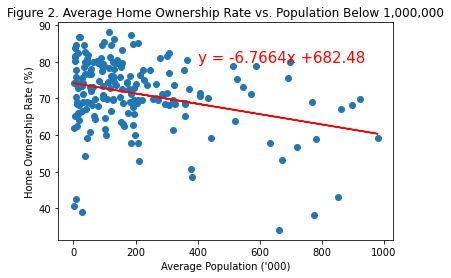

In [39]:
# Analysis of home ownership rate vs. average population below 1,000,000

# First restrict the data to counties with Population below 1000000
df3 = df2[df2["Population"]<1000000]

# Firsst convert population to population in thousands
df3["Population ('000)"] = (df2["Population"] / 1000)


# Define the axes
x = df3.iloc[:,5].values.reshape(-1,1)
y = df3.iloc[:,0].values.reshape(-1,1)

# Fit regression line
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

# Get x & y values for regression equation
owner = df3.iloc[:,0]
pop = df3.iloc[:,5]

# Calculate parameters to get regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(owner, pop)
line_eq = "y = " +str(round(slope, 4)) + "x +" + str(round(intercept,2))


# Plot and labe the scatter plot and fit the regression line
plt.scatter(x, y)
plt.plot(x, y_pred, color="r")
plt.annotate(line_eq, (400,80), fontsize=15, color="r")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Average Population ('000)")
plt.title("Figure 2. Average Home Ownership Rate for Counties Population Below 1,000,000")
plt.savefig("Images/fig2.png")

#### Figure 2: Home Ownership Rates for Counties with Population Below 1,000,000
The negative relationship persists but the strength of the relationship is weakened significantly. In fact further analysis showed that as we limit the sample to counties with lesser population sizes, the negative relationship vanishes. This seems to support the premise that increases in population reduces the homeownershi rate.

Next, I will examine the impact of median household income on this relationship

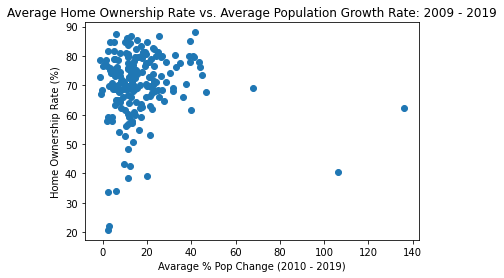

In [23]:
# scatter plot of home ownership rate vs. population growth
y = df2.loc[:,"Ownership Rate (%)"]
x = df2.loc[:,"Pop Change (%)"]

plt.scatter(x, y)
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Avarage % Pop Change (2010 - 2019)")
plt.title("Average Home Ownership Rate vs. Average Population Growth Rate: 2009 - 2019")
plt.savefig("Images/fig2.png")

#### Figure 2: Population Growth and Home Ownership Rates
Figure 2 does not appear to provide any clear evidence that higher population growth has an effect on the home ownership rate.

Text(0.5, 1.0, 'Average Home Ownership Rate vs. Average Median Income: 2009 - 2019')

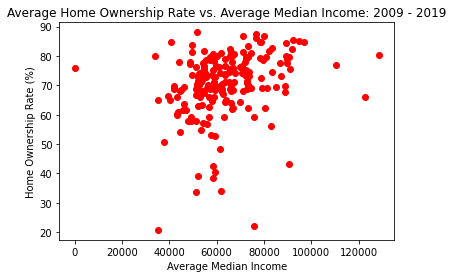

In [24]:
# scatter plot of home ownership rate vs. median income
y = df2.loc[:,"Ownership Rate (%)"]
x = df2.loc[:,"Income"]

plt.scatter(x, y, color="r")
plt.ylabel("Home Ownership Rate (%)")
plt.xlabel("Average Median Income")
plt.title("Average Home Ownership Rate vs. Average Median Income: 2009 - 2019")

In [ ]:
df2.plot.scatter( x="Ownership Rate (%)", y="Pop Change (%)", title="Average Home Ownership Rate vs. Average Population Growth Rate")

In [14]:
# Convert population to population in thousands
df2["Population ('000)"] = (df2["Population"] / 1000)

df2

,Ownership Rate (%),Population Change Abs,Pop Change (%),Population,Population ('000)
County,,,,,
Ada,70.162929,89215.0,22.737351,432914.70,432.91470
Addison,76.627274,-41.0,-0.111359,36896.70,36.89670
Alameda,56.284380,161071.0,10.665131,1606881.90,1606.88190
Albany,54.197032,2581.0,7.110389,37780.50,37.78050
Ascension,81.276240,19389.0,18.084223,117767.20,117.76720
...,...,...,...,...,...
Windham,72.738073,-1598.0,-1.349890,117185.30,117.18530
Wright,86.230406,13680.0,10.970593,130876.00,130.87600
Yolo,52.840932,19645.0,9.780688,210905.20,210.90520


Text(0.5, 1.0, 'Average Home Ownership Rate vs. Average Population')

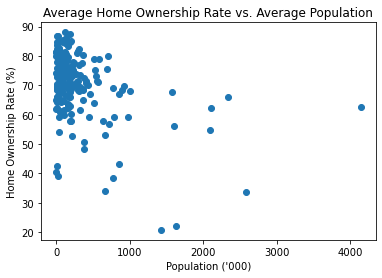

In [22]:
# Plot the ownership rate vs population
x = df2.iloc[:,4]
y = df2.iloc[:,0]

plt.scatter(x, y)
plt.xlabel("Population ('000)")
plt.ylabel("Home Ownership Rate (%)")
plt.title("Average Home Ownership Rate vs. Average Population")

#df2.plot.scatter(x="Population ('000)", y="Ownership Rate (%)", title="Average Home Ownership Rate vs. Average Population ")

In [55]:
# Examine the results for counties with population below 1000000
df3 = df2[df2["Population"]>1500000]
df3

,Ownership Rate (%),Population Change Abs,Pop Change (%),Population,Population ('000)
County,,,,,
Alameda,56.284380,161071.0,10.665131,1606881.9,1606.8819
Clark,54.794043,315447.0,16.166257,2088408.1,2088.4081
King,62.360672,321495.0,16.646671,2103370.6,2103.3706
Kings,33.525902,55182.0,2.203120,2575816.2,2575.8162
Maricopa,62.701356,668049.0,17.500265,4140303.1,4140.3031
Middlesex,67.802183,108566.0,7.222648,1571480.1,1571.4801
NewYork,22.244906,42325.0,2.668022,1623910.5,1623.9105
Riverside,65.950540,280781.0,12.822426,2335696.3,2335.6963


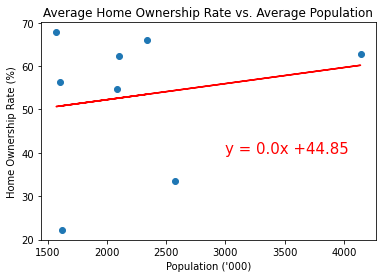

In [56]:
# Plot the ownership rate vs population for counties with population less than 1000000

#Define x & y variables
x = df3.iloc[:,4].values.reshape(-1,1)
y = df3.iloc[:,0].values.reshape(-1,1)

# Fit regression line
lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x)

# Get x & y values for regression equation
pop = df3.loc[:,"Population"]
owner = df3.loc[:,"Ownership Rate (%)"]

# Calculate parameters to get regression line
(slope, intercept, rvalue, pvalue, stderr) = linregress(pop, owner)
line_eq = "y = " +str(round(slope, 4)) + "x +" + str(round(intercept,2))

plt.scatter(x, y)
plt.plot(x, y_pred, color="r")
plt.annotate(line_eq, (3000,40), fontsize=15, color="r")
plt.xlabel("Population ('000)")
plt.ylabel("Home Ownership Rate (%)")
plt.title("Average Home Ownership Rate vs. Average Population")
plt.show()

In [4]:
mhi = pd.read_csv("Resource/mhi.csv")
mhi

,Year,Bethel Census Area/AK,Denali Borough/AK,Kusilvak Census Area/AK,Matanuska-Susitna Borough/AK,Skagway Municipality/AK,Baldwin County/AL,Lee County/AL,Limestone County/AL,Madison County/AL,...,Berkeley County/WV,Doddridge County/WV,Jefferson County/WV,Monongalia County/WV,Morgan County/WV,Albany County/WY,Crook County/WY,Laramie County/WY,Lincoln/WY,Teton/WY
0,2009,41810,62615,NaN,70442,63947,48637,37836,46610,57327,...,51243,32803,58859,35331,38804,40772,50581,50441,59160,68777
1,2010,45481,61004,NaN,68670,58550,47618,40102,49667,54633,...,50923,34444,63156,42247,40636,40430,53961,50278,58175,68358
2,2011,43314,68899,NaN,68999,61025,50144,42539,46760,55298,...,51029,35261,59280,43447,40762,45651,55294,53839,60062,69095
3,2012,41722,66325,NaN,68109,65379,48867,43182,49616,57072,...,52672,34753,62924,41503,41087,39248,53781,53999,60817,66592
4,2013,42876,68103,NaN,72371,63930,47539,44647,50148,58258,...,54010,39399,64916,47281,42719,42443,59490,59712,67256,70201
5,2014,45808,69692,NaN,73981,69170,49626,41256,51175,58833,...,56737,41838,66950,43835,44446,42838,59701,57192,63575,75348
6,2015,44849,73000,33511.0,76601,65878,52387,46442,55060,59117,...,54217,41115,67821,46718,45628,44455,64851,59147,62364,83290
7,2016,46634,72378,34341.0,71793,65112,56460,47749,52181,61193,...,56966,40524,71315,49725,59573,47355,60953,61124,63907,84118
8,2017,45582,73220,31250.0,72296,66991,56607,51372,57342,62750,...,59071,44370,70203,50621,44448,44745,61664,61658,65137,90145
9,2018,44304,75477,32728.0,74649,74635,57588,48937,64863,63755,...,59619,44725,75027,51070,49487,47561,64053,63839,69598,99087


In [13]:
mhinc = mhi.stack()
#mhinc = mhinc.sort_values()

mhinc.to_csv("Resource/mhinc.csv")

In [26]:
#visualize population data
popn_df.head()

,CountyID,County,State,Year,Population
0,AdaID2010,Ada,ID,2010,393354
1,AdaID2011,Ada,ID,2011,401262
2,AdaID2012,Ada,ID,2012,408862
3,AdaID2013,Ada,ID,2013,415951
4,AdaID2014,Ada,ID,2014,425471


In [27]:
#visualize home ownership rate data
ownership_df.head()

,Year,CountyID,State,County,Home Ownership (%)
0,2009,AdaID2009,ID,Ada,73.167951
1,2010,AdaID2010,ID,Ada,72.448222
2,2011,AdaID2011,ID,Ada,71.267323
3,2012,AdaID2012,ID,Ada,69.819289
4,2013,AdaID2013,ID,Ada,69.484129


In [28]:
permits_df.head()

,Year,CountyID,State,County,Building Permits
0,1990,AdaID1990,ID,Ada,2570
1,1991,AdaID1991,ID,Ada,2601
2,1992,AdaID1992,ID,Ada,3735
3,1993,AdaID1993,ID,Ada,4940
4,1994,AdaID1994,ID,Ada,5266


In [29]:
income_df.head()

,Year,CountyID,State,County,Median Income
0,1989,AdaID1989,ID,Ada,30093
1,1990,AdaID1990,ID,Ada,.
2,1991,AdaID1991,ID,Ada,.
3,1992,AdaID1992,ID,Ada,.
4,1993,AdaID1993,ID,Ada,36652


In [30]:
# drop the duplicate columns before merging
popn_df = popn_df.drop(columns=["County", "State", "Year"])

#  first merge population to homeownership rate
df1 = pd.merge(ownership_df, popn_df, on="CountyID", how="inner")

df1.head()

,Year,CountyID,State,County,Home Ownership (%),Population
0,2010,AdaID2010,ID,Ada,72.448222,393354
1,2011,AdaID2011,ID,Ada,71.267323,401262
2,2012,AdaID2012,ID,Ada,69.819289,408862
3,2013,AdaID2013,ID,Ada,69.484129,415951
4,2014,AdaID2014,ID,Ada,68.500504,425471


In [31]:
# drop the duplicate columns before merging
permits_df = permits_df.drop(columns=["County", "State", "Year"])

# Then merge the result with the permits data
df2 = pd.merge(df1, permits_df, on="CountyID", how="inner")

df2.head()

,Year,CountyID,State,County,Home Ownership (%),Population,Building Permits
0,2010,AdaID2010,ID,Ada,72.448222,393354,1285
1,2011,AdaID2011,ID,Ada,71.267323,401262,1453
2,2012,AdaID2012,ID,Ada,69.819289,408862,2631
3,2013,AdaID2013,ID,Ada,69.484129,415951,3281
4,2014,AdaID2014,ID,Ada,68.500504,425471,3968


In [32]:
# drop the duplicate columns before merging
income_df = income_df.drop(columns=["County", "State", "Year"])

# Then merge the result with the income data
df3 = pd.merge(df2, income_df, on="CountyID", how="inner")

df3.head()

,Year,CountyID,State,County,Home Ownership (%),Population,Building Permits,Median Income
0,2010,AdaID2010,ID,Ada,72.448222,393354,1285,50909
1,2011,AdaID2011,ID,Ada,71.267323,401262,1453,50701
2,2012,AdaID2012,ID,Ada,69.819289,408862,2631,54337
3,2013,AdaID2013,ID,Ada,69.484129,415951,3281,53420
4,2014,AdaID2014,ID,Ada,68.500504,425471,3968,57908


In [33]:
df3.tail()

,Year,CountyID,State,County,Home Ownership (%),Population,Building Permits,Median Income
355,2015,WilliamsND2015,ND,Williams,67.352931,35301,803,89860
356,2016,WilliamsND2016,ND,Williams,68.388783,34213,200,81719
357,2017,WilliamsND2017,ND,Williams,65.317185,33467,57,80161
358,2018,WilliamsND2018,ND,Williams,60.812629,35469,88,79354
359,2019,WilliamsND2019,ND,Williams,57.535750,37589,125,84606


In [34]:
# Check count
df3.count()

Year                  360
CountyID              360
State                 360
County                360
Home Ownership (%)    360
Population            360
Building Permits      360
Median Income         360
dtype: int64

In [35]:
# Check datatypes
df3.dtypes

Year                    int64
CountyID               object
State                  object
County                 object
Home Ownership (%)    float64
Population              int64
Building Permits        int64
Median Income          object
dtype: object

In [36]:
# convert the median income data to numeric data
df3["Median Income"] = pd.to_numeric(df3["Median Income"])
df3.dtypes

Year                    int64
CountyID               object
State                  object
County                 object
Home Ownership (%)    float64
Population              int64
Building Permits        int64
Median Income           int64
dtype: object

In [37]:
# Calculate the number of building permits per 1000 people
df3["Permits Per 1000"] = (df3["Building Permits"] / df3["Population"])*1000
df3.head()

,Year,CountyID,State,County,Home Ownership (%),Population,Building Permits,Median Income,Permits Per 1000
0,2010,AdaID2010,ID,Ada,72.448222,393354,1285,50909,3.266778
1,2011,AdaID2011,ID,Ada,71.267323,401262,1453,50701,3.621076
2,2012,AdaID2012,ID,Ada,69.819289,408862,2631,54337,6.434934
3,2013,AdaID2013,ID,Ada,69.484129,415951,3281,53420,7.887948
4,2014,AdaID2014,ID,Ada,68.500504,425471,3968,57908,9.326135


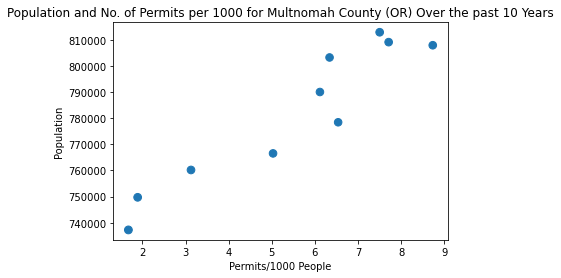

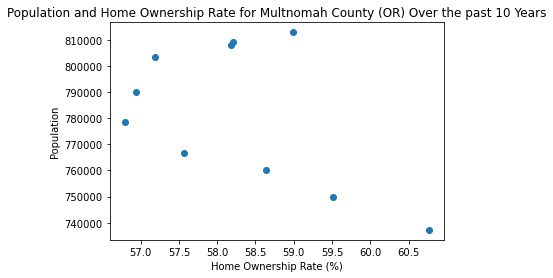

In [76]:
# Plot of Permits Per 1000 People and Population for Multnomah County Oregon
x = df3.loc[df3.County == "Multnomah", "Permits Per 1000"]
y = df3.loc[df3.County == "Multnomah", "Population"]

plt.scatter(x,y, s=df3.loc[df3.County == "Multnomah", "Home Ownership (%)"], alpha=1)
plt.title("Population and No. of Permits per 1000 for Multnomah County (OR) Over the past 10 Years")
plt.xlabel("Permits/1000 People")
plt.ylabel("Population")
plt.show()

# Population and home ownership rate
x = df3.loc[df3.County == "Multnomah", "Home Ownership (%)"]
y = df3.loc[df3.County == "Multnomah", "Population"]
 

plt.scatter(x,y, alpha=1)
ax = plt.title("Population and Home Ownership Rate for Multnomah County (OR) Over the past 10 Years")
plt.xlabel("Home Ownership Rate (%)")
plt.ylabel("Population")
plt.show()

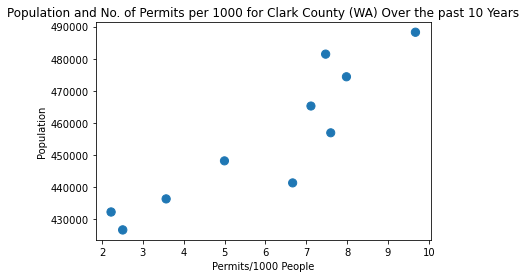

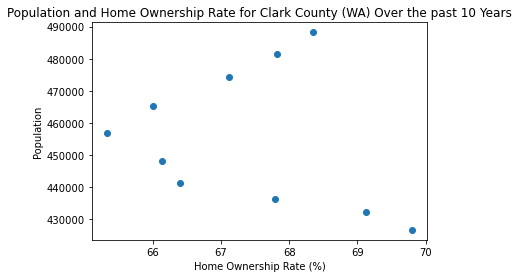

In [77]:
# Plot of Permits Per 1000 People and Population for Clark County Washington
x = df3.loc[df3.County == "ClarkWA", "Permits Per 1000"]
y = df3.loc[df3.County == "ClarkWA", "Population"]

plt.scatter(x,y, s=df3.loc[df3.County == "ClarkWA", "Home Ownership (%)"], alpha=1)
plt.title("Population and No. of Permits per 1000 for Clark County (WA) Over the past 10 Years")
plt.xlabel("Permits/1000 People")
plt.ylabel("Population")
plt.show()

# Population and home ownership rate
x = df3.loc[df3.County == "ClarkWA", "Home Ownership (%)"]
y = df3.loc[df3.County == "ClarkWA", "Population"]
plt.scatter(x,y, alpha=1)
plt.title("Population and Home Ownership Rate for Clark County (WA) Over the past 10 Years")
plt.xlabel("Home Ownership Rate (%)")
plt.ylabel("Population")
plt.show()

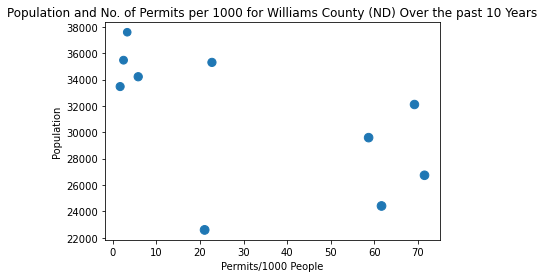

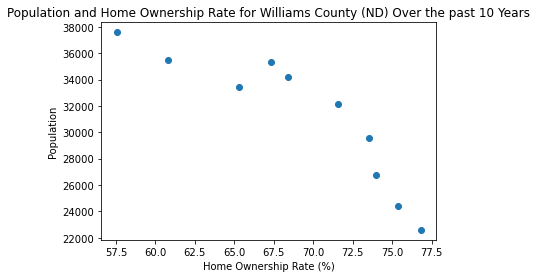

In [78]:
# Plot of Permits/1000 People and Population for the fastest growing county in the last decadeWilliams County North Dakota 
x = df3.loc[df3.County == "Williams", "Permits Per 1000"]
y = df3.loc[df3.County == "Williams", "Population"]

plt.scatter(x,y, s=df3.loc[df3.County == "Williams", "Home Ownership (%)"], alpha=1)
plt.title("Population and No. of Permits per 1000 for Williams County (ND) Over the past 10 Years")
plt.xlabel("Permits/1000 People")
plt.ylabel("Population")
plt.show()

# Population and home ownership rate
x = df3.loc[df3.County == "Williams", "Home Ownership (%)"]
y = df3.loc[df3.County == "Williams", "Population"]
plt.scatter(x,y, alpha=1)
plt.title("Population and Home Ownership Rate for Williams County (ND) Over the past 10 Years")
plt.xlabel("Home Ownership Rate (%)")
plt.ylabel("Population")
plt.show()

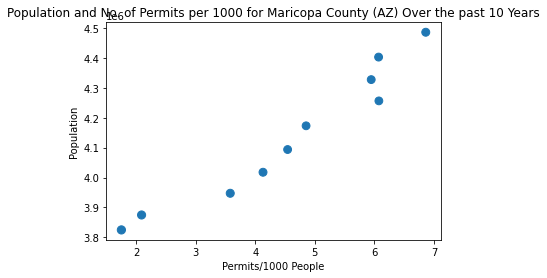

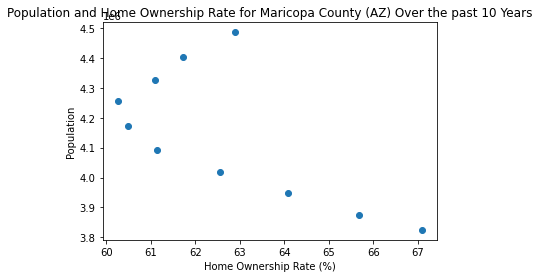

In [79]:
# Plot of Permits/1000 People and Population for the county with the highest gain in population
#in the last decade Maricopa County Arizona

x = df3.loc[df3.County == "Maricopa", "Permits Per 1000"]
y = df3.loc[df3.County == "Maricopa", "Population"]

plt.scatter(x,y, s=df3.loc[df3.County == "Maricopa", "Home Ownership (%)"], alpha=1)
plt.title("Population and No. of Permits per 1000 for Maricopa County (AZ) Over the past 10 Years")
plt.xlabel("Permits/1000 People")
plt.ylabel("Population")
plt.show()

# Population and home ownership rate
x = df3.loc[df3.County == "Maricopa", "Home Ownership (%)"]
y = df3.loc[df3.County == "Maricopa", "Population"]
plt.scatter(x,y, alpha=1)
plt.title("Population and Home Ownership Rate for Maricopa County (AZ) Over the past 10 Years")
plt.xlabel("Home Ownership Rate (%)")
plt.ylabel("Population")
plt.show()

In [38]:
print(f"Below are the counties I currently have data on")
print(f"------------------------------------------------------")
df3.County.unique()

Below are the counties I currently have data on
------------------------------------------------------


array(['Ada', 'Austin', 'Bernalillo', 'Bexar', 'Clackamas', 'ClarkNV',
       'ClarkWA', 'Comal', 'Cook', 'Dallas', 'Denver', 'ElPaso', 'Harris',
       'Kendall', 'King', 'LosAngeles', 'Maricopa', 'MiamiDade',
       'Multnomah', 'NewYork', 'Orange', 'Philadelphia', 'Pierce', 'Pima',
       'Riverside', 'SaltLake', 'SanDiego', 'Snohomish', 'Sumter',
       'Tarrant', 'Travis', 'Utah', 'Wasatch', 'Washington', 'Washoe',
       'Williams'], dtype=object)

In [41]:
means = df3[["Population", "Median Income", "Home Ownership (%)", "Building Permits", "County", "Permits Per 1000"]].groupby(["County"]).mean()
means

,Population,Median Income,Home Ownership (%),Building Permits,Permits Per 1000
County,,,,,
Ada,432914.7,58786.8,70.162929,4095.2,9.221744
Austin,29199.5,56394.2,75.498730,24.5,0.838160
Bernalillo,674939.3,49015.4,65.669691,1338.0,1.981543
Bexar,1871048.2,51704.7,63.207634,6346.7,3.358754
Clackamas,397259.1,69774.3,72.515639,1592.2,3.984286
ClarkNV,2088408.1,53424.7,54.794043,10080.7,4.767277
ClarkWA,455115.1,64945.4,67.385497,2766.0,5.980552
Comal,128634.2,69698.2,76.233580,2073.7,15.627885
Cook,5215707.1,57426.5,61.166096,7005.4,1.344368


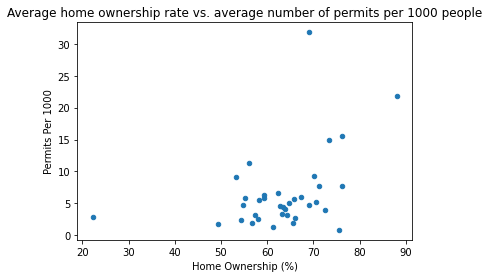

In [80]:
# Average home ownership rate vs. average number of permits per 1000 people
means.plot.scatter( x="Home Ownership (%)", y="Permits Per 1000", title="Average home ownership rate vs. average number of permits per 1000 people")

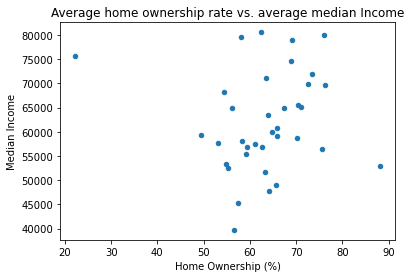

In [81]:
# Average home ownership rate vs. average median Income
means.plot.scatter(y="Median Income", x="Home Ownership (%)", title="Average home ownership rate vs. average median Income")

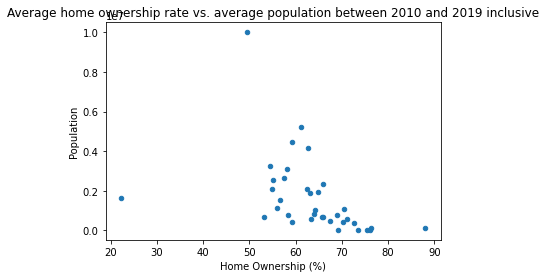

In [82]:
# Average home ownership rate vs. average population between 2010 and 2019 inclusive
means.plot.scatter(y="Population", x="Home Ownership (%)", title="Average home ownership rate vs. average population between 2010 and 2019 inclusive")